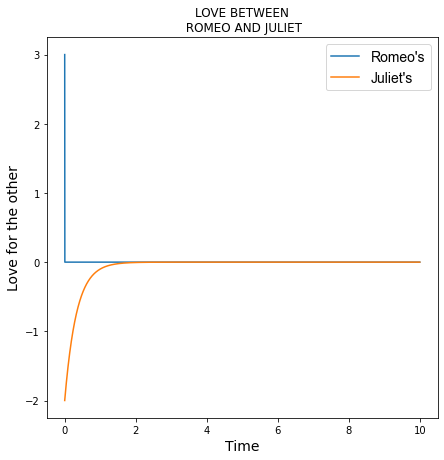

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
%matplotlib inline


# The Impilicit Euler formulars in the form of the Newton Raphson Algorithm 
# var_old + h * f(var_new) - var_new
def T(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, h):

    return Ti + h - Ti_new


def R(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dR, h):

    return Ri + h * dR(Ti_new, Ri_new, Ji_new) - Ri_new


def J(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dJ, h):

    return Ji + h * dJ(Ti_new, Ri_new, Ji_new) - Ji_new


# Jacobian is used to calcute the change of the ODE system which has multiple variables instead of normal derivative
def jacobian(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dR, dJ, h):

    jacob = np.ones((3, 3))
    d = 1e-9

    jacob[0, 0] = (T(Ti, Ri, Ji, (Ti_new + d), Ri_new, Ji_new, h) - T(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, h)) / d
    jacob[0, 1] = (T(Ti, Ri, Ji, Ti_new, (Ri_new + d), Ji_new, h) - T(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, h)) / d
    jacob[0, 2] = (T(Ti, Ri, Ji, Ti_new, Ri_new, (Ji_new + d), h) - T(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, h)) / d

    jacob[1, 0] = (R(Ti, Ri, Ji, (Ti_new + d), Ri_new, Ji_new, dR, h) - R(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dR, h)) / d
    jacob[1, 1] = (R(Ti, Ri, Ji, Ti_new, (Ri_new + d), Ji_new, dR, h) - R(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dR, h)) / d
    jacob[1, 2] = (R(Ti, Ri, Ji, Ti_new, Ri_new, (Ji_new + d), dR, h) - R(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dR, h)) / d

    jacob[2, 0] = (J(Ti, Ri, Ji, (Ti_new + d), Ri_new, Ji_new, dJ, h) - J(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dJ, h)) / d
    jacob[2, 1] = (J(Ti, Ri, Ji, Ti_new, (Ri_new + d), Ji_new, dJ, h) - J(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dJ, h)) / d
    jacob[2, 2] = (J(Ti, Ri, Ji, Ti_new, Ri_new, (Ji_new + d), dJ, h) - J(Ti, Ri, Ji, Ti_new, Ri_new, Ji_new, dJ, h)) / d

    return jacob

# Newton Raphson Algorithm loops for new X to receive the one in the acceptable error
def NewtonRhapson(Ti, Ri, Ji, T_guess, R_guess, J_guess, dR, dJ, h):

    X_old = np.ones((3, 1))
    X_old[0] = T_guess
    X_old[1] = R_guess
    X_old[2] = J_guess

    X = np.ones((3, 1))

    LTE = 9e9
    acceptLTE = 1e-9

    while LTE > acceptLTE:

        jacob = jacobian(Ti, Ri, Ji, X_old[0], X_old[1], X_old[2], dR, dJ, h)

        X[0] = T(Ti, Ri, Ji, X_old[0], X_old[1], X_old[2], h)
        X[1] = R(Ti, Ri, Ji, X_old[0], X_old[1], X_old[2], dR, h)
        X[2] = J(Ti, Ri, Ji, X_old[0], X_old[1], X_old[2], dJ, h)

        X_new = X_old - np.matmul(np.linalg.inv(jacob), X)

        LTE = np.max(np.abs(X_new - X_old))

        X_old = X_new

    return [X_new[0], X_new[1], X_new[2]]


# using Implicit Euler Method (implementing Newton Raphson Algorithm) to calculate the solution for ODE system
def implicit_euler(dR, dJ, R0, J0, tspan, dt):

    t = np.arange(0, tspan, dt)
    # declare arrays to contain the instant values from 0 to tspan
    T = np.zeros(len(t))
    R = np.zeros(len(t))
    J = np.zeros(len(t))

    T[0] = 0  # starting point of time at t = 0
    R[0] = R0 # starting point of R at t = 0
    J[0] = J0 # starting point of J at t = 0

    T_guess = dt  # t i+1
    R_guess = 10  # random initial value, better if it is near the R i+1
    J_guess = 10  # random initial value, better if it is near the J i+1

    for i in range(1, len(t)):

        T[i], R[i], J[i] = NewtonRhapson(T[i-1], R[i-1], J[i-1], T_guess, R_guess, J_guess, dR, dJ, dt)

        T_guess = T[i]
        R_guess = R[i]
        J_guess = J[i]

    return [t, R, J]



# Definition for R'
def dR(T, R, J):
    return -0.04 * R + 10000 * R * J
# Definition for J'
def dJ(T, R, J):
    return R * R - 3 * J
# initial value of X0 = (R0 J0)^Tranpose 
R0 = 3
J0 = -2


# plot solution
t, R, J = implicit_euler(dR, dJ, R0, J0, 10, 0.001)
plt.figure(figsize=(7, 7))
font = font_manager.FontProperties(family='Arial',
                                   weight='normal',
                                   style='normal', size=14)
plt.plot(t, R)
plt.plot(t, J)
plt.title("LOVE BETWEEN\n ROMEO AND JULIET")
plt.xlabel("Time", {'size': 14})
plt.ylabel("Love for the other", {'size': 14})
plt.legend(["Romeo's", "Juliet's"], loc="upper right", prop=font)
plt.show()


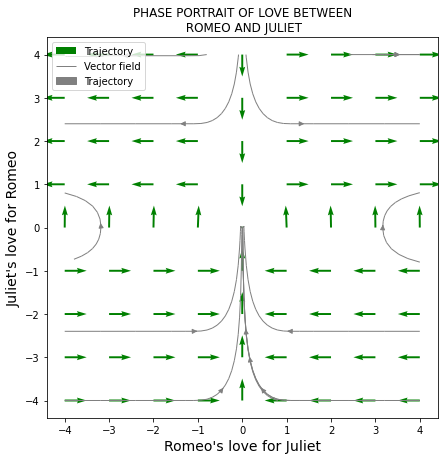

In [111]:
# plot the phase portrait of R and Jcut from the vector space (T, R, J) at T = 0
plt.figure(figsize=(7, 7))
plt.xlim([-4.4, 4.4])
plt.ylim([-4.4, 4.4])


R, J = np.meshgrid(np.linspace(-4, 4, 9), np.linspace(-4, 4, 9))
_R = dR(0, R, J)
_J = dJ(0, R, J)
M = (np.hypot(_R, _J))
M[M == 0] = 1
_R /= M
_J /= M

plt.title("PHASE PORTRAIT OF LOVE BETWEEN\n ROMEO AND JULIET")
plt.xlabel("Romeo's love for Juliet", {'size':14})
plt.ylabel("Juliet's love for Romeo", {'size':14})
plt.quiver(R, J, _R, _J, color = 'g', width = 0.005)
plt.streamplot(R, J, _R, _J, density = 0.2, linewidth = 1, color = "gray", broken_streamlines = False)
plt.legend(["Trajectory", "Vector field", "Trajectory"], loc = "upper left")
plt.show()